- Site web homme: https://6point9.sn/categorie/homme
- Site web femme: https://6point9.sn/categorie/femme

**Etape 1:** *Installation et importation des bibliotheques*

In [1]:
pip install requests beautifulsoup4 scrapy selenium pandas seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import re
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import pearsonr
from scipy.stats import f_oneway

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

C:\Users\HP\AppData\Local\Temp\ipykernel_7388\81041957.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


**Etape 3 :** *Recuperation des informations d'un produit avec* ***BeautifulSoup***

- Page 6point 9 | Homme: https://6point9.sn/categorie/homme

In [5]:
from bs4 import BeautifulSoup

def extract_product_info(html_content):
    soup = BeautifulSoup(html_content, 'html.parser')
    products = []
    
    # Trouver toutes les cartes de produits
    product_cards = soup.find_all('div', class_='card product-card card-static')
    
    for card in product_cards:
        # Extraire le titre du produit
        title_tag = card.find('h3', class_='product-title fs-sm')
        if title_tag and title_tag.a:
            title = title_tag.a.text.strip()
        else:
            title = 'N/A'
        
        # Extraire le lien de l'image du produit
        image_tag = card.find('a', class_='card-img-top')
        if image_tag and 'style' in image_tag.attrs:
            image_link = image_tag['style'].split('url(')[1].split(')')[0].strip()
        else:
            image_link = 'N/A'
        
        # Extraire le prix du produit
        price_tag = card.find('div', class_='product-price')
        if price_tag:
            price_span = price_tag.find('span', class_='text-accent')
            if price_span:
                price = price_span.text.strip()
            else:
                price = 'N/A'
        else:
            price = 'N/A'
        
        # Ajouter les informations du produit à la liste
        products.append({
            'title': title,
            'image_link': image_link,
            'price': price
        })
    
    return products

# Charger le contenu HTML depuis le fichier téléchargé
file_path = 'homme.html'
with open(file_path, 'r', encoding='utf-8') as file:
    html_content = file.read()

# Extraire les informations des produits
product_info = extract_product_info(html_content)

# Afficher les informations extraites
for product in product_info:
    print(product)


{'title': 'Tenue Traditionnelle', 'image_link': 'https://sixpointneuf.innovebox.com/storage/app/public/4273/conversions/660169bbca904_88DC58A5-7450-4398-9614-80072FE4A4AD-thumb.jpg', 'price': '80.000Fcfa'}
{'title': 'Tenue Traditionnelle', 'image_link': 'https://sixpointneuf.innovebox.com/storage/app/public/4272/conversions/660169bb713db_7CF03219-A82E-42E3-9C9C-02A41D3B85B9-thumb.jpg', 'price': '80.000Fcfa'}
{'title': 'Tenue Traditionnelle', 'image_link': 'https://sixpointneuf.innovebox.com/storage/app/public/4255/conversions/660169b208807_6B2F21BF-DFF5-4D72-850F-AF89182D0182-thumb.jpg', 'price': '80.000Fcfa'}
{'title': 'Tenue Traditionnelle', 'image_link': 'https://sixpointneuf.innovebox.com/storage/app/public/4254/conversions/660169b18cc33_D2653FC1-8253-4A03-B6FC-A659B0DBF04C-thumb.jpg', 'price': '80.000Fcfa'}
{'title': 'Tenue Traditionnelle', 'image_link': 'https://sixpointneuf.innovebox.com/storage/app/public/4247/conversions/660169adef5fc_7AE39296-DC8B-4D8D-92D0-4F53B5CC57F0-thumb

**Etape 4:** *Gesion des erreurs avec* ***BeautifulSoup et requests***

In [1]:
import requests
from bs4 import BeautifulSoup
from requests.exceptions import RequestException, Timeout

def fetch_html(url, timeout=10):
    """
    Fetch the HTML content from the given URL with a specified timeout.
    
    Parameters:
    url (str): The URL to fetch the HTML content from.
    timeout (int): The maximum time (in seconds) to wait for a response.
    
    Returns:
    str: The HTML content of the page, or None if an error occurred.
    """
    try:
        # Envoyer une requête HTTP GET à l'URL avec un délai d'attente spécifié
        response = requests.get(url, timeout=timeout)
        # Vérifier si la requête a réussi (statut HTTP 200)
        response.raise_for_status()
        # Retourner le contenu HTML de la réponse
        return response.text
    except Timeout:
        # Gérer le cas où le temps de réponse a expiré
        print(f"Erreur : Le temps de réponse pour {url} a expiré.")
        return None
    except RequestException as e:
        # Gérer d'autres erreurs de requête HTTP
        print(f"Erreur de requête : {e}")
        return None

def extract_product_info(html_content):
    """
    Extract product information from the given HTML content.
    
    Parameters:
    html_content (str): The HTML content of the page.
    
    Returns:
    list: A list of dictionaries containing product information.
    """
    if not html_content:
        # Si le contenu HTML est None, retourner une liste vide
        return []
    
    # Analyser le contenu HTML avec BeautifulSoup
    soup = BeautifulSoup(html_content, 'html.parser')
    products = []
    
    # Trouver toutes les cartes de produits dans la page
    product_cards = soup.find_all('div', class_='card product-card card-static')
    
    for card in product_cards:
        # Extraire le titre du produit
        title_tag = card.find('h3', class_='product-title fs-sm')
        if title_tag and title_tag.a:
            title = title_tag.a.text.strip()  # Extraire le texte du titre
        else:
            title = 'N/A'  # Si le titre n'est pas trouvé, utiliser 'N/A'
        
        # Extraire le lien de l'image du produit
        image_tag = card.find('a', class_='card-img-top')
        if image_tag and 'style' in image_tag.attrs:
            # Extraire le lien de l'image à partir de l'attribut 'style'
            image_link = image_tag['style'].split('url(')[1].split(')')[0].strip()
        else:
            image_link = 'N/A'  # Si l'image n'est pas trouvée, utiliser 'N/A'
        
        # Extraire le prix du produit
        price_tag = card.find('div', class_='product-price')
        if price_tag:
            price_span = price_tag.find('span', class_='text-accent')
            if price_span:
                price = price_span.text.strip()  # Extraire le texte du prix
            else:
                price = 'N/A'  # Si le prix n'est pas trouvé, utiliser 'N/A'
        else:
            price = 'N/A'  # Si le conteneur de prix n'est pas trouvé, utiliser 'N/A'
        
        # Ajouter les informations du produit à la liste des produits
        products.append({
            'title': title,
            'image_link': image_link,
            'price': price
        })
    
    return products

# URL de la page à scraper
url = 'https://6point9.sn/categorie/homme'

# Récupérer le contenu HTML de la page
html_content = fetch_html(url)

# Extraire les informations des produits
product_info = extract_product_info(html_content)

# Afficher les informations extraites des produits
for product in product_info:
    print(product)


Erreur : Le temps de réponse pour https://6point9.sn/categorie/homme a expiré.


### *<p style="font-style:italic;">- Stockage des donnees en CSV</p>*

In [16]:
import requests
from bs4 import BeautifulSoup
import csv

def fetch_html(url):
    """
    Fetch the HTML content from the given URL.
    
    Parameters:
    url (str): The URL to fetch the HTML content from.
    
    Returns:
    str: The HTML content of the page.
    """
    # Envoyer une requête HTTP GET à l'URL
    response = requests.get(url)
    # Retourner le contenu HTML de la réponse
    return response.text

def extract_product_info(html_content):
    """
    Extract product information from the given HTML content.
    
    Parameters:
    html_content (str): The HTML content of the page.
    
    Returns:
    list: A list of dictionaries containing product information.
    """
    # Analyser le contenu HTML avec BeautifulSoup
    soup = BeautifulSoup(html_content, 'html.parser')
    products = []
    
    # Trouver toutes les cartes de produits dans la page
    product_cards = soup.find_all('div', class_='card product-card card-static')
    
    for card in product_cards:
        # Extraire le titre du produit
        title_tag = card.find('h3', class_='product-title fs-sm')
        if title_tag and title_tag.a:
            title = title_tag.a.text.strip()  # Extraire le texte du titre
        else:
            title = 'N/A'  # Si le titre n'est pas trouvé, utiliser 'N/A'
        
        # Extraire le lien de l'image du produit
        image_tag = card.find('a', class_='card-img-top')
        if image_tag and 'style' in image_tag.attrs:
            # Extraire le lien de l'image à partir de l'attribut 'style'
            image_link = image_tag['style'].split('url(')[1].split(')')[0].strip()
        else:
            image_link = 'N/A'  # Si l'image n'est pas trouvée, utiliser 'N/A'
        
        # Extraire le prix du produit
        price_tag = card.find('div', class_='product-price')
        if price_tag:
            price_span = price_tag.find('span', class_='text-accent')
            if price_span:
                price = price_span.text.strip()  # Extraire le texte du prix
            else:
                price = 'N/A'  # Si le prix n'est pas trouvé, utiliser 'N/A'
        else:
            price = 'N/A'  # Si le conteneur de prix n'est pas trouvé, utiliser 'N/A'
        
        # Ajouter les informations du produit à la liste des produits
        products.append({
            'title': title,
            'image_link': image_link,
            'price': price
        })
    
    return products

def save_to_csv(products, filename):
    """
    Save the list of products to a CSV file.
    
    Parameters:
    products (list): The list of dictionaries containing product information.
    filename (str): The name of the CSV file to save the data to.
    """
    # Définir les en-têtes du fichier CSV
    headers = ['title', 'image_link', 'price']
    
    # Ouvrir le fichier en mode écriture
    with open(filename, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=headers)
        # Écrire les en-têtes dans le fichier CSV
        writer.writeheader()
        # Écrire les données des produits dans le fichier CSV
        writer.writerows(products)

# URL de la page à scraper
url = 'https://6point9.sn/categorie/homme'

# Récupérer le contenu HTML de la page
html_content = fetch_html(url)

# Extraire les informations des produits
product_info = extract_product_info(html_content)

# Enregistrer les informations extraites dans un fichier CSV
save_to_csv(product_info, 'produits.csv')

# Afficher un message de confirmation
print("Les informations des produits ont été enregistrées dans 'produits.csv'.")


Les informations des produits ont été enregistrées dans 'produits.csv'.


In [15]:
import pandas as pd
data = pd.read_csv('produits.csv')
data.head()

,title,image_link,price
0,Tenue Traditionnelle,https://sixpointneuf.innovebox.com/storage/app...,80.000Fcfa
1,Tenue Traditionnelle,https://sixpointneuf.innovebox.com/storage/app...,80.000Fcfa
2,Tenue Traditionnelle,https://sixpointneuf.innovebox.com/storage/app...,80.000Fcfa
3,Tenue Traditionnelle,https://sixpointneuf.innovebox.com/storage/app...,80.000Fcfa
4,Tenue Traditionnelle,https://sixpointneuf.innovebox.com/storage/app...,80.000Fcfa


### *<p style="font-style:italic;">- Analyse et visualisation des donnees</p>*

**Etape 1 :** *Nettoyage et préparation des données*

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lire les données du fichier CSV
df = pd.read_csv('produits.csv')

# Afficher les premières lignes du DataFrame
print(df.head())

# Nettoyer les données : enlever les lignes où le titre, l'image ou le prix est manquant
df = df[(df['title'] != 'N/A') & (df['image_link'] != 'N/A') & (df['price'] != 'N/A')]

# Convertir les prix en numérique (enlever les symboles de monnaie et les espaces inutiles)
df['price'] = df['price'].str.replace('Fcfa', '').str.replace(' FCFA', '').str.replace(',', '').str.replace(' ', '').astype(float)

# Afficher un résumé des données nettoyées
print(df.info())
print(df.describe())


                  title                                         image_link  \
0  Tenue Traditionnelle  https://sixpointneuf.innovebox.com/storage/app...   
1  Tenue Traditionnelle  https://sixpointneuf.innovebox.com/storage/app...   
2  Tenue Traditionnelle  https://sixpointneuf.innovebox.com/storage/app...   
3  Tenue Traditionnelle  https://sixpointneuf.innovebox.com/storage/app...   
4  Tenue Traditionnelle  https://sixpointneuf.innovebox.com/storage/app...   

        price  
0  80.000Fcfa  
1  80.000Fcfa  
2  80.000Fcfa  
3  80.000Fcfa  
4  80.000Fcfa  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   title       20 non-null     object 
 1   image_link  36 non-null     object 
 2   price       36 non-null     float64
dtypes: float64(1), object(2)
memory usage: 996.0+ bytes
None
           price
count  36.000000
mean   63.333333
std     7.55928

**Etape 2 :** *Analyse et visualisation des donnes*

- Calcul des statistiques descriptives

In [18]:
import numpy as np

# Statistiques descriptives
mean_price = df['price'].mean()
median_price = df['price'].median()
std_price = df['price'].std()

print(f"Prix moyen: {mean_price:.2f} FCFA")
print(f"Prix médian: {median_price:.2f} FCFA")
print(f"Écart-type des prix: {std_price:.2f} FCFA")

# Distribution des prix
price_distribution = df['price'].value_counts().sort_index()

print("Distribution des prix:")
print(price_distribution)


Prix moyen: 63.33 FCFA
Prix médian: 60.00 FCFA
Écart-type des prix: 7.56 FCFA
Distribution des prix:
price
60.0    30
80.0     6
Name: count, dtype: int64


**Etape 3 :** *Visualisation des données*
- Création des visualisations

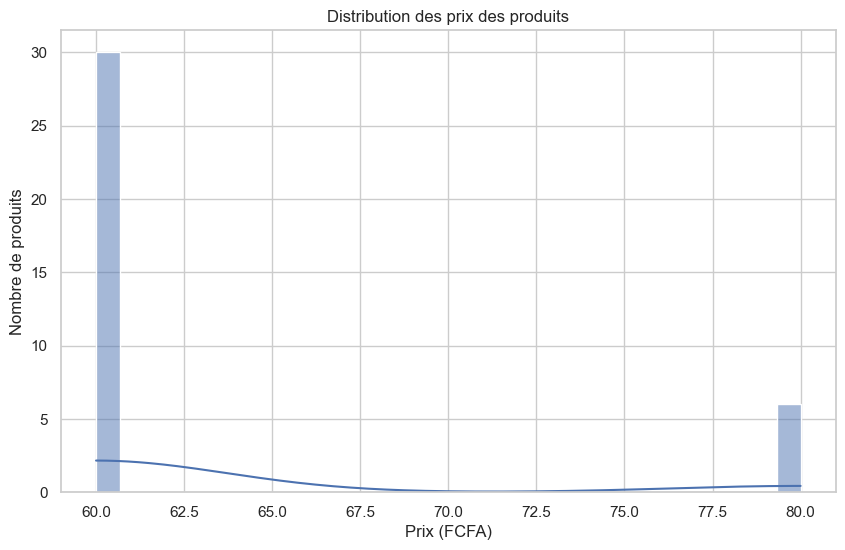

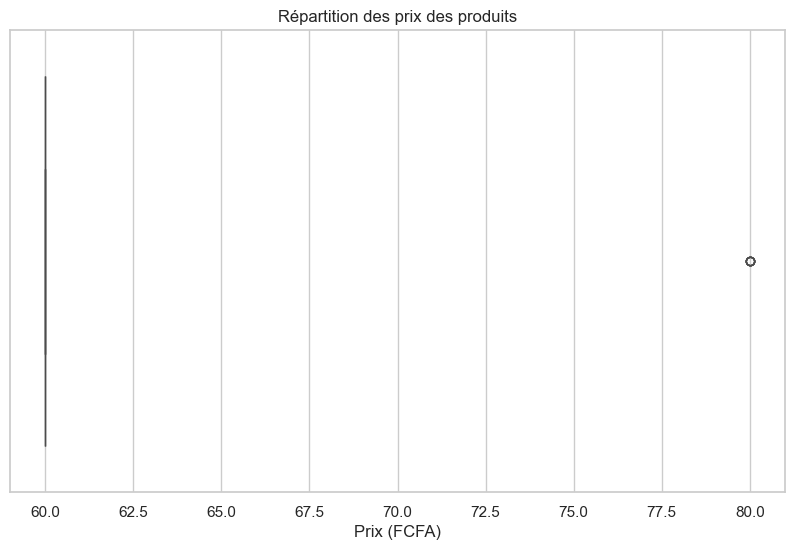

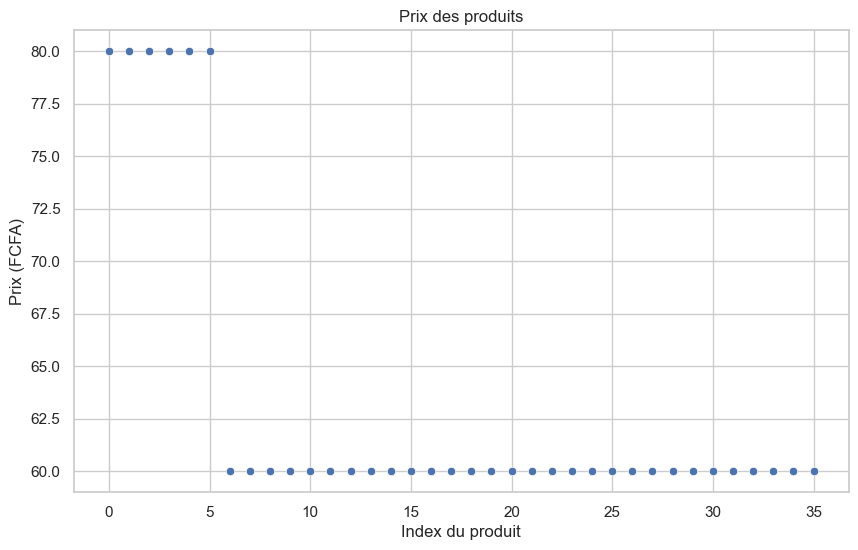

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Style des graphiques
sns.set(style="whitegrid")

# Histogramme des prix
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=30)
plt.title('Distribution des prix des produits')
plt.xlabel('Prix (FCFA)')
plt.ylabel('Nombre de produits')
plt.show()

# Boîte à moustaches des prix
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Répartition des prix des produits')
plt.xlabel('Prix (FCFA)')
plt.show()

# Nuage de points des prix
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=np.arange(len(df)), y='price')
plt.title('Prix des produits')
plt.xlabel('Index du produit')
plt.ylabel('Prix (FCFA)')
plt.show()
